# SLC4A1

SLC4A1 codes for Band 3 is the major glycoprotein of the erythrocyte membrane. Several diseases are associated with pathogenic variants in this gene.

In [2]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")

Loaded HPO v2024-12-12
Using genophenocorr version 0.9.2


# SLC4A1
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SLC4A1.

In [3]:
gene_symbol = 'SLC4A1'
mane_tx_id = 'NM_000342.4'
mane_protein_id = "NP_000333.1" # band 3 anion transport protein"

In [4]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.23") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()

Individuals Processed: 100%|██████████| 33/33 [00:19<00:00,  1.72 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [5]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
24,Distal renal tubular acidosis
23,Alkaline urine
18,Nephrocalcinosis
13,Impaired renal concentrating ability
13,Decreased serum bicarbonate concentration
12,Reticulocytosis
11,Hypokalemia
10,Nephrolithiasis
10,Hemolytic anemia
8,Increased red cell osmotic fragility


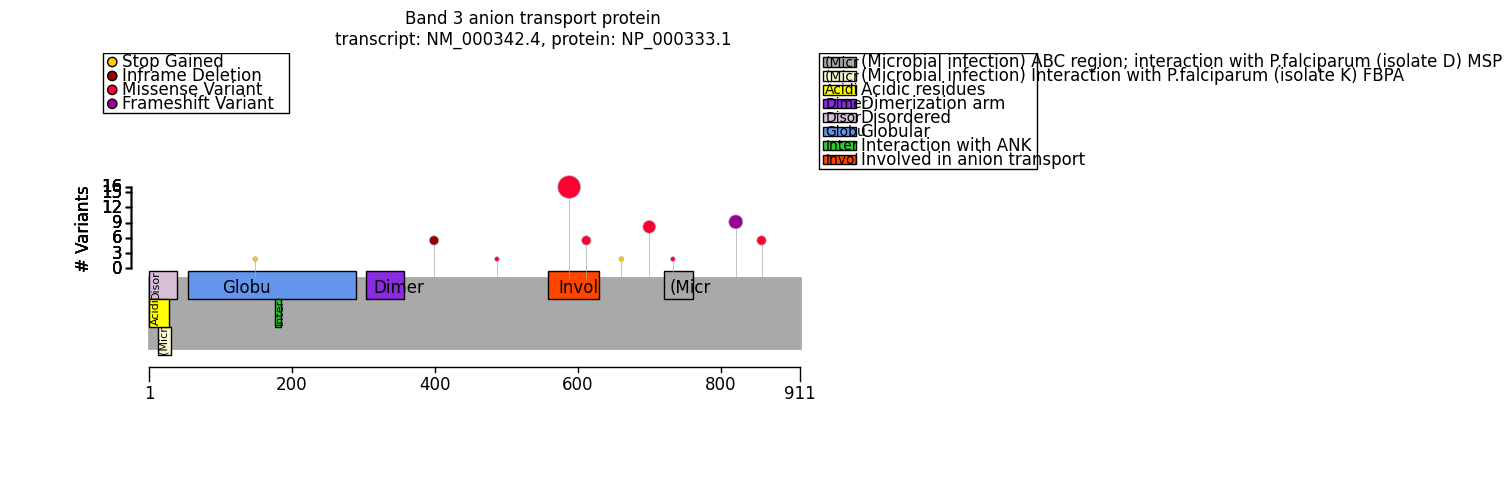

In [6]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt
slc4a1_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
slc4a1_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.view import MtcStatsViewer
from gpsea.analysis.predicate import variant_key
from gpsea.analysis.clf import monoallelic_classifier

r589h = variant_key(key="17_44255707_44255707_C_T") # c.1766G>A; p.Arg589His

r589h_clf = monoallelic_classifier(
    a_predicate=r589h, 
    b_predicate=~r589h, 
    a_label="r149w",
    b_label="other",
)

r589h_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r589h_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(r589h_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,26
HMF03,Skipping term because of a child term with the same individual counts,1
HMF08,Skipping general term,51
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,54


In [9]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=r589h_result)

Allele group                                        r149w         other  \
                                                    Count Percent Count   
Nephrolithiasis [HP:0000787]                         9/14     64%   1/4   
Nephrocalcinosis [HP:0000121]                        9/14     64%   4/4   
Hypokalemia [HP:0002900]                             4/14     29%   2/4   
Abnormal renal morphology [HP:0012210]              11/11    100%   4/4   
Abnormality of the kidney [HP:0000077]              14/14    100%   4/4   
Alkaline urine [HP:0032944]                         14/14    100%   3/3   
Renal tubular dysfunction [HP:0000124]              14/14    100%   4/4   
Abnormal renal physiology [HP:0012211]              14/14    100%   4/4   
Distal renal tubular acidosis [HP:0008341]          13/14     93%   4/4   
Renal tubular acidosis [HP:0001947]                 13/13    100%   4/4   
Metabolic acidosis [HP:0001942]                     13/13    100%   4/4   
Acidosis [HP:0001941]                               13/13    100%   4/4   
Decreased serum bicarbonate concentration [HP:0...   8/14     57%   3/4   

Allele group                                                                   \
                                                   Percent Corrected p values   
Nephrolithiasis [HP:0000787]                           25%                1.0   
Nephrocalcinosis [HP:0000121]                         100%                1.0   
Hypokalemia [HP:0002900]                               50%                1.0   
Abnormal renal morphology [HP:0012210]                100%                1.0   
Abnormality of the kidney [HP:0000077]                100%                1.0   
Alkaline urine [HP:0032944]                           100%                1.0   
Renal tubular dysfunction [HP:0000124]                100%                1.0   
Abnormal renal physiology [HP:0012211]                100%                1.0   
Distal renal tubular acidosis [HP:0008341]            100%                1.0   
Renal tubular acidosis [HP:0001947]                   100%                1.0   
Metabolic acidosis [HP:0001942]                       100%                1.0   
Acidosis [HP:0001941]                                 100%                1.0   
Decreased serum bicarbonate concentration [HP:0...     75%                1.0   

Allele group                                                  
                                                    p values  
Nephrolithiasis [HP:0000787]                        0.274510  
Nephrocalcinosis [HP:0000121]                       0.277778  
Hypokalemia [HP:0002900]                            0.568627  
Abnormal renal morphology [HP:0012210]              1.000000  
Abnormality of the kidney [HP:0000077]              1.000000  
Alkaline urine [HP:0032944]                         1.000000  
Renal tubular dysfunction [HP:0000124]              1.000000  
Abnormal renal physiology [HP:0012211]              1.000000  
Distal renal tubular acidosis [HP:0008341]          1.000000  
Renal tubular acidosis [HP:0001947]                 1.000000  
Metabolic acidosis [HP:0001942]                     1.000000  
Acidosis [HP:0001941]                               1.000000  
Decreased serum bicarbonate concentration [HP:0...  1.000000

# Summary

In [10]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

f_results = (
    GPAnalysisResultSummary.from_multi(
        result=r589h_result,
    ),
)

caption = "No statistically significant results identified."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [11]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
r149w,other,13,0


In [12]:
summarizer.process_latex(report=report, protein_fig=slc4a1_fig)

Figure saved to ../../supplement/img/SLC4A1_protein_diagram-draft.pdf
Output to ../../supplement/tex/SLC4A1_summary_draft.tex
